In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("vgsales.csv")


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Checking for missing values


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.describe(include= 'object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There are missing values in year and publisher column


In [8]:
df.shape

(16598, 11)

In [9]:
df.Year.isnull().sum()/16598 * 100


1.6327268345583803

In [10]:
df.Publisher.isnull().sum()/16598 * 100

0.3494396915290999

Since missing values are not that in great percentage, dropping them will have minimal effect on insights

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(16291, 11)

In [13]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
df.Year = df.Year.astype('int')

In [15]:
df.Year.dtype

dtype('int32')

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Univariate analysis


In [17]:
#total number of games 
df.Name.value_counts().sum()

16291

In [18]:
#total games released by every platform
# df['Platform'].
platform = df.groupby('Platform').size().reset_index(name  ='count')
platform.sort_values(by = ['count'], ascending = False, inplace = True)

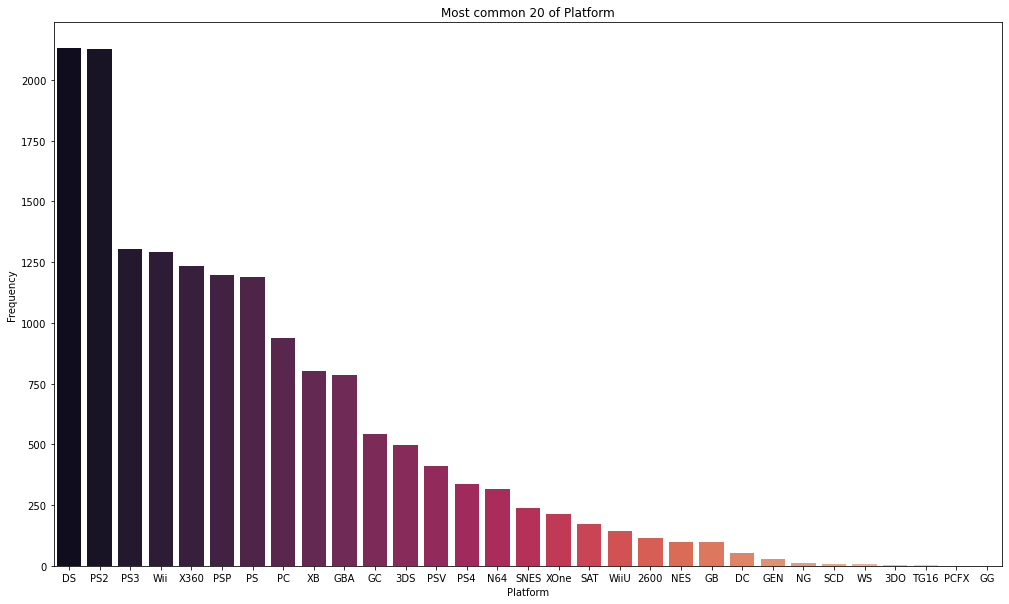

In [19]:
platform_name = list(platform.Platform)
count = list(platform['count'])
plt.figure(figsize=(17,10))
ax=sns.barplot( x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most common 20 of Platform')
plt.show()

In [22]:
publisher_count = df.groupby('Publisher').size().reset_index(name = 'count')

In [38]:
publisher_count=publisher_count.sort_values('count', ascending = False).head(10)

<AxesSubplot:xlabel='Publisher', ylabel='count'>

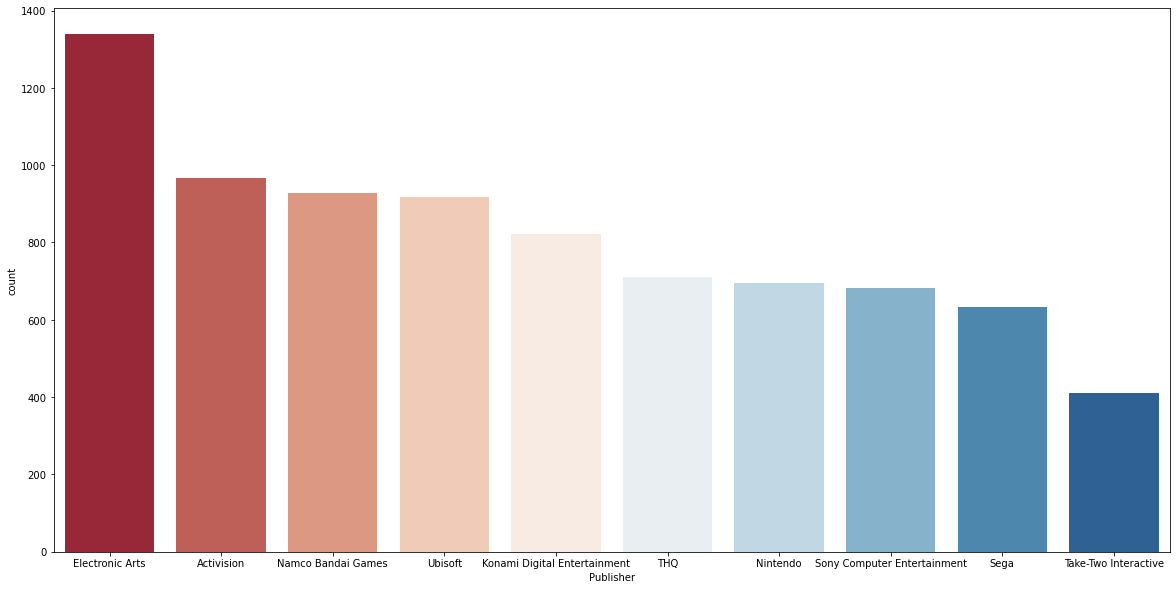

In [66]:
plt.figure(figsize = (20,10))
sns.barplot(x='Publisher', y = 'count', data = publisher_count, palette = 'RdBu')



In [94]:
genre_count = df.groupby('Genre').size().reset_index(name = 'no_of_games')

In [123]:
genre_count.no_of_games.size

12

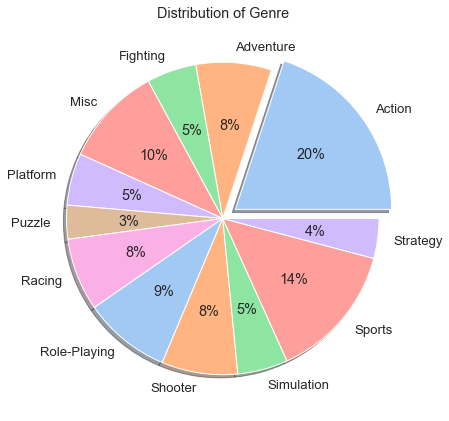

In [141]:
plt.figure(figsize = (7,10))
sns.set(font_scale= 1.2)
colors = sns.color_palette('pastel')[0:7]
explode_arr = np.zeros(genre_count.no_of_games.size)
explode_arr[0] = 0.1
plt.pie(genre_count.no_of_games, labels = genre_count.Genre, colors = colors, autopct='%.0f%%', shadow = True, explode= explode_arr)
plt.title('Distribution of Genre')
plt.show()

In [118]:
explode_arr[2] =

SyntaxError: invalid syntax (Temp/ipykernel_24452/3246975807.py, line 1)